In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci

1.1 Visualizing the data

In [3]:
data2 = np.loadtxt('ex2data1.txt', delimiter=',')

x = data2[:,:2]
y = data2[:,2]#[np.newaxis].T
print(x.shape, y.shape)

(100, 2) (100,)


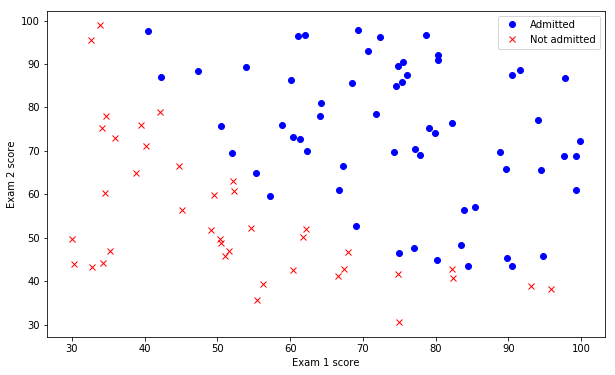

In [4]:
pos = y == 1
neg = y == 0

plt.figure(figsize=(10,6))
plt.plot(x[pos, 0], x[pos, 1],'bo')
plt.plot(x[neg, 0], x[neg, 1], 'rx')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])

1.2 Implementation

In [5]:
def sigmoid(z):
    #z = np.array(z)
    #g = np.zeros(z.shape)
    g = 1/(1+np.exp(z))
    return g

z = 0
g = sigmoid(z)
print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [17]:
m, n = x.shape

x = np.insert(x, 0, 1, axis=1)

In [38]:
def cost(theta, x, y):
    h = sigmoid(np.dot(x, theta)) 
    cost = -1*(1/m) * (np.dot(np.log(h).T, y) + np.dot(np.log(1-h).T, 1-y))
    return cost

In [24]:
def gradient(theta, x, y):
    h = sigmoid(np.dot(x, theta))
    
    gradient = (1/m) * np.dot(x.T, (h-y))
    return gradient
    


In [42]:
initial_theta = np.zeros(n+1)
print('gradient at zeros:', gradient(initial_theta, x, y))
print('cost at zeros:', cost(initial_theta, x, y))

gradient at zeros: [ -0.1        -12.00921659 -11.26284221]
cost at zeros: 0.6931471805599452
